# Exploratory Data Analysis - Fraud Data

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt #plotting
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

from sklearn import svm

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_curve, auc, precision_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
%matplotlib inline

In [2]:
credit = pd.read_csv("D:\Projects\Kaggle\Fraud Detection\creditcard.csv")

In [3]:
credit.isnull().sum()[credit.isnull().sum()>0]

Series([], dtype: int64)

<h1>Exploring the Dataset</h1>

From the above it could be infered that the dataset has 28 anonymized features and 3 non anonymized features 
- Amount 
- Time
- Class (whether the transcation was a fraud or not) 

### Statistical Details

In [5]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Imbalanced nature of the data

In [6]:
Fraud = credit[credit['Class']==1]
NFraud = credit[credit['Class']==0]

In [7]:
print((len(Fraud)/len(NFraud))*100,"%")

0.17304750013189596 %


It can be inferred that the datset is skewed with just 0.17274% fradulent examples. One could simply get a overall accuracy of 99.82726% by predicting every example isnt a fradulent example. But, the approach does not solve the problem. So recall rate (True positives/(True Positives+False Negatives)) would be the metric to optimize.  

#### The Amount in fraud txns are not huge amounts. Lets see whether there is any relationship with the time of the transactions

<Figure size 576x576 with 0 Axes>

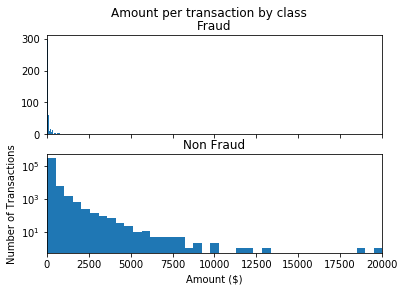

In [91]:
plt.figure(figsize=(8,8))

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(NFraud.Amount, bins = bins)
ax2.set_title('Non Fraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Text(0,0.5,'Number of Transactions')

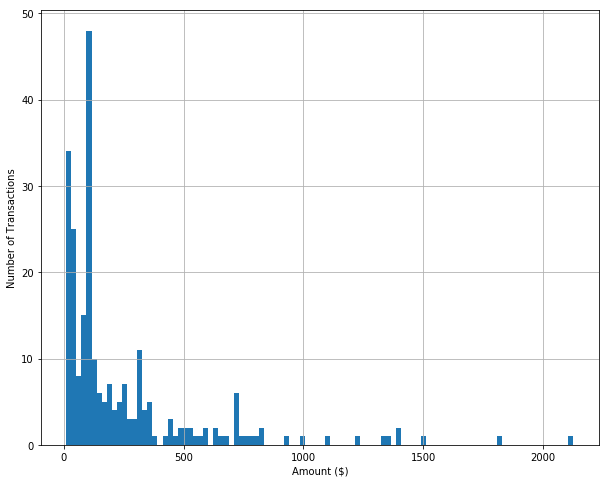

In [89]:
plt.figure(figsize=(10,8))
Fraud.Amount[Fraud.Amount>=10].hist(bins = 100)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

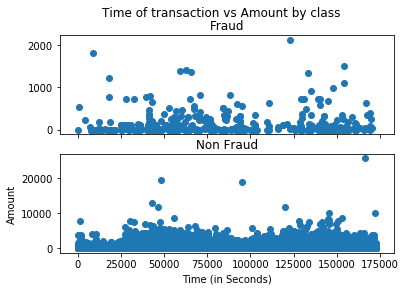

In [76]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(NFraud.Time, NFraud.Amount)
ax2.set_title('Non Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<h2>Exploring Transcation Amount</h2>

**Fradulent Data**

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


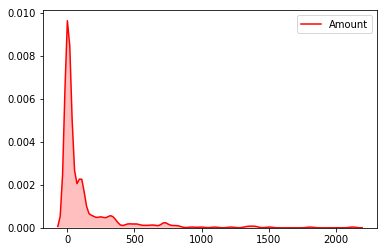

In [8]:
sns.kdeplot(Fraud['Amount'],shade=True,color="red")

**Non-Fradulent Data**

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


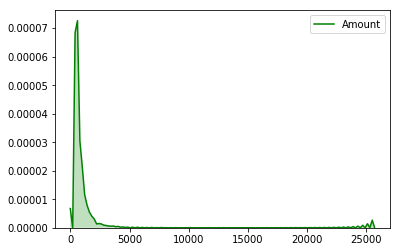

In [9]:
sns.kdeplot(NFraud['Amount'],shade=True,color="green")

<h2>Exploring Transcation Time</h2>

**Non-Fradulent Data**

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


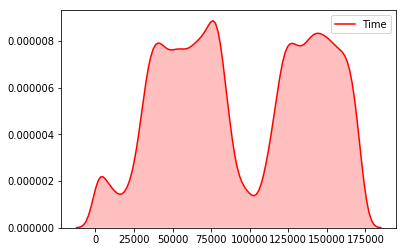

In [10]:
sns.kdeplot(NFraud['Time'],shade=True,color="red")

**Fradulent Data**

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


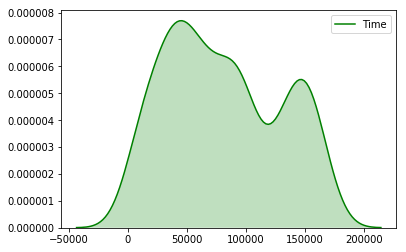

In [11]:
sns.kdeplot(Fraud['Time'],shade=True,color="green")

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


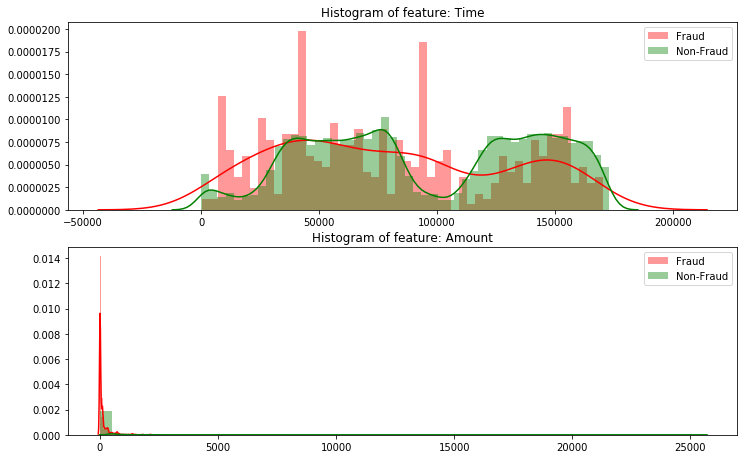

In [55]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, col in enumerate( ['Time', 'Amount']):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[col][credit.Class == 1], bins=50, color='r', label='Fraud')
    sns.distplot(credit[col][credit.Class == 0], bins=50, color= 'g', label='Non-Fraud')
    ax.set_xlabel('')
    plt.legend()
    ax.set_title('Histogram of feature: ' + str(col))
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


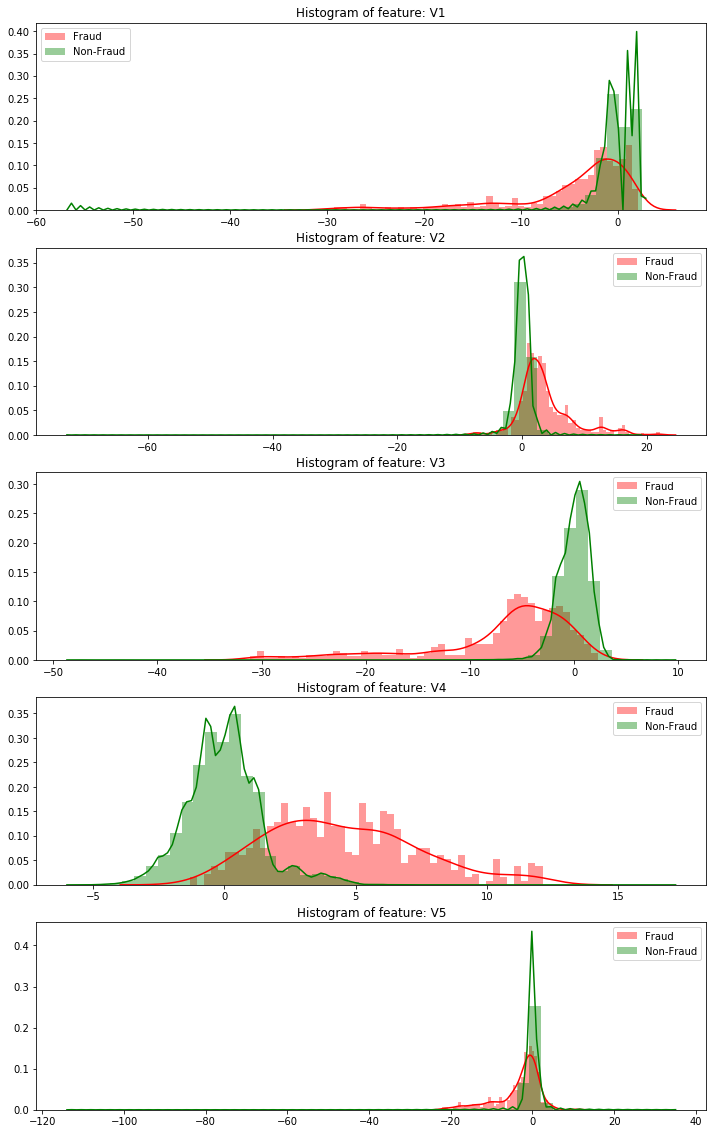

In [56]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, col in enumerate(credit.columns[1:6]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[col][credit.Class == 1], bins=50, color='red', label='Fraud')
    sns.distplot(credit[col][credit.Class == 0], bins=50, color= 'green', label='Non-Fraud')
    ax.set_xlabel('')
    plt.legend()
    ax.set_title('Histogram of feature: ' + str(col))
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


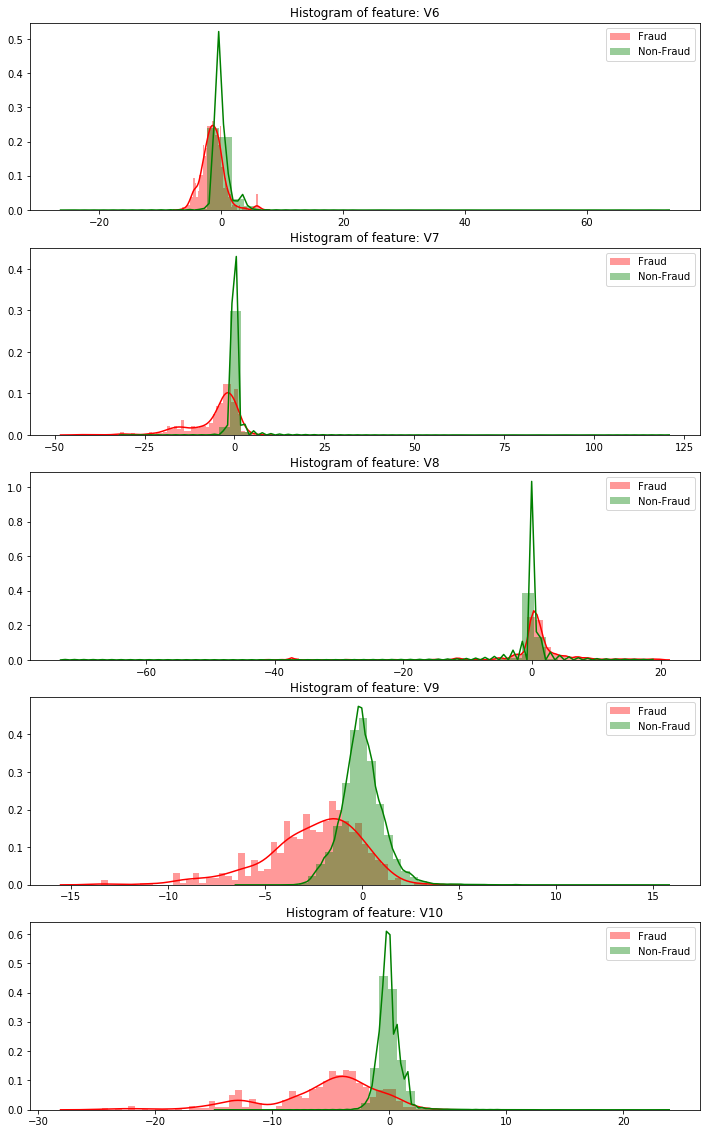

In [57]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, col in enumerate(credit.columns[6:11]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[col][credit.Class == 1], bins=50, color='red', label='Fraud')
    sns.distplot(credit[col][credit.Class == 0], bins=50, color= 'green', label='Non-Fraud')
    ax.set_xlabel('')
    plt.legend()
    ax.set_title('Histogram of feature: ' + str(col))
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


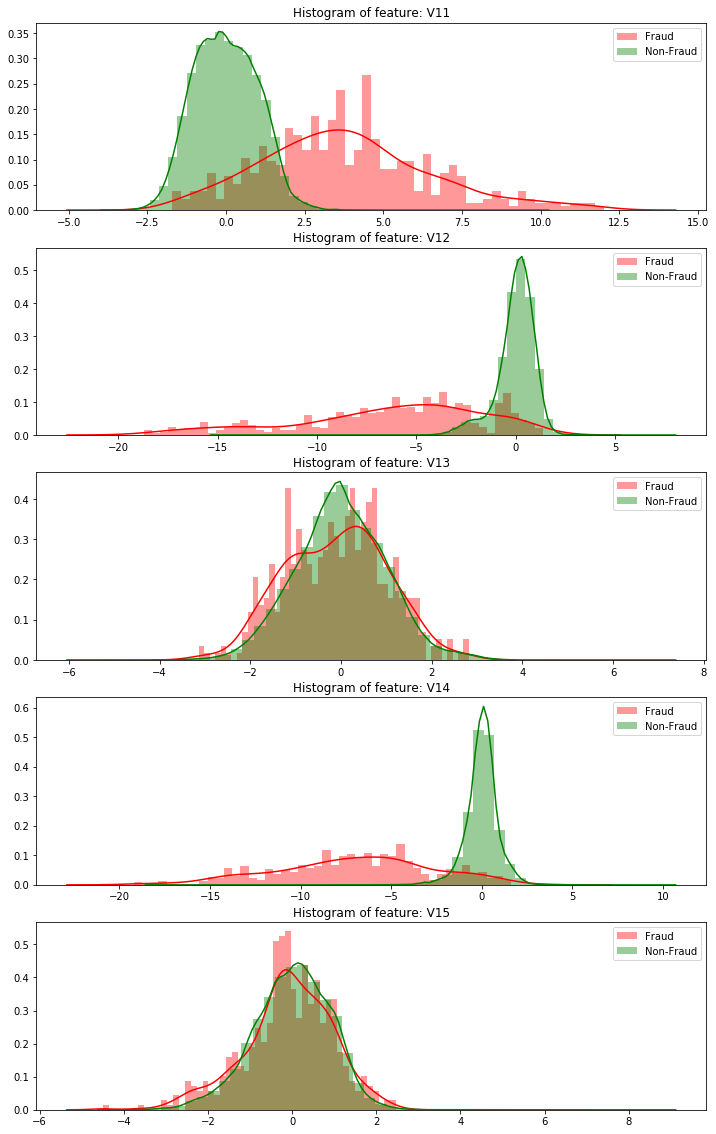

In [58]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, col in enumerate(credit.columns[11:16]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[col][credit.Class == 1], bins=50, color='red', label='Fraud')
    sns.distplot(credit[col][credit.Class == 0], bins=50, color= 'green', label='Non-Fraud')
    ax.set_xlabel('')
    plt.legend()
    ax.set_title('Histogram of feature: ' + str(col))
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


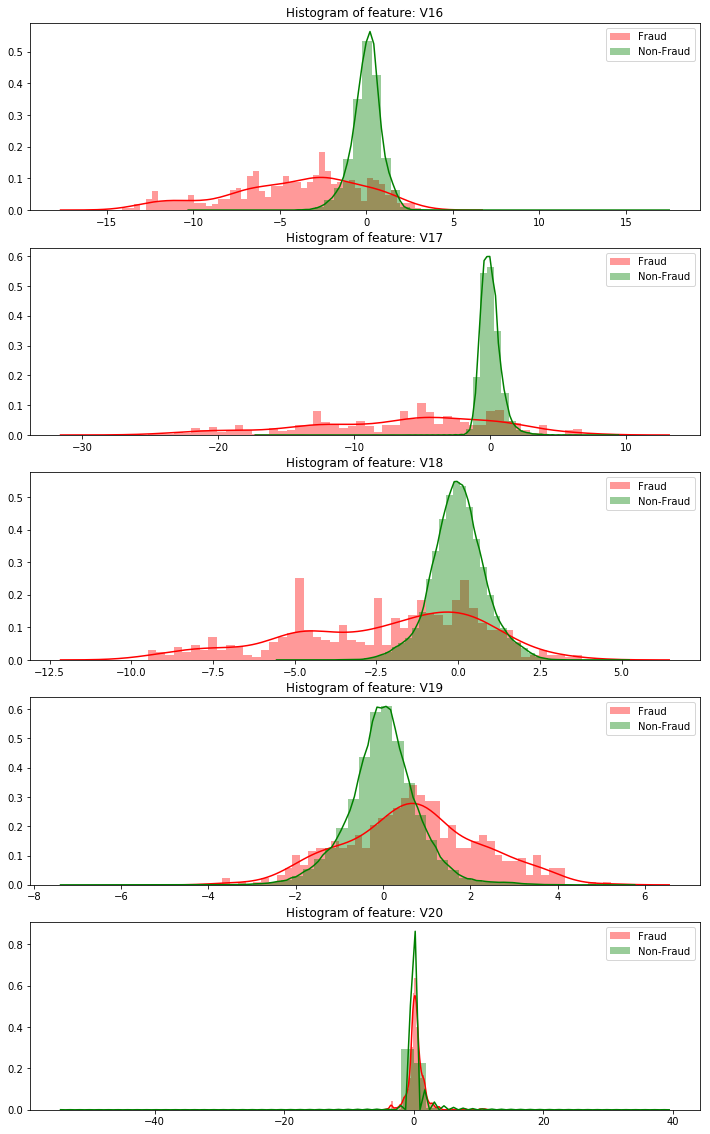

In [59]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, col in enumerate(credit.columns[16:21]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[col][credit.Class == 1], bins=50, color='red', label='Fraud')
    sns.distplot(credit[col][credit.Class == 0], bins=50, color= 'green', label='Non-Fraud')
    ax.set_xlabel('')
    plt.legend()
    ax.set_title('Histogram of feature: ' + str(col))
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


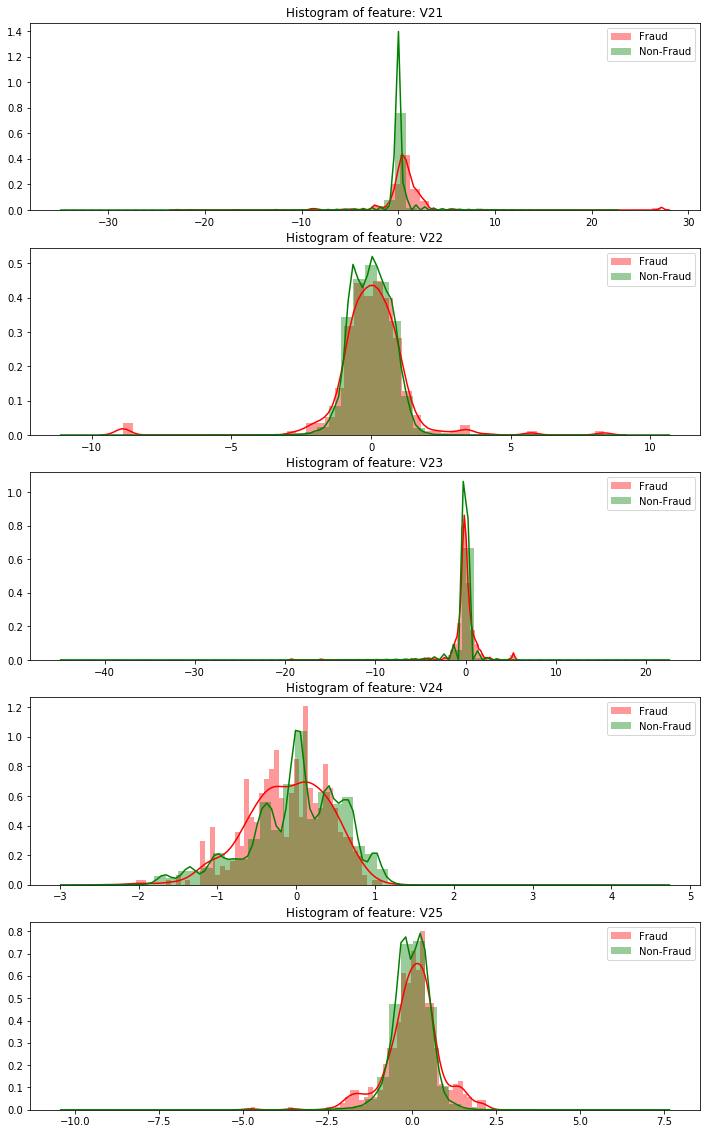

In [60]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, col in enumerate(credit.columns[21:26]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[col][credit.Class == 1], bins=50, color='red', label='Fraud')
    sns.distplot(credit[col][credit.Class == 0], bins=50, color= 'green', label='Non-Fraud')
    ax.set_xlabel('')
    plt.legend()
    ax.set_title('Histogram of feature: ' + str(col))
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


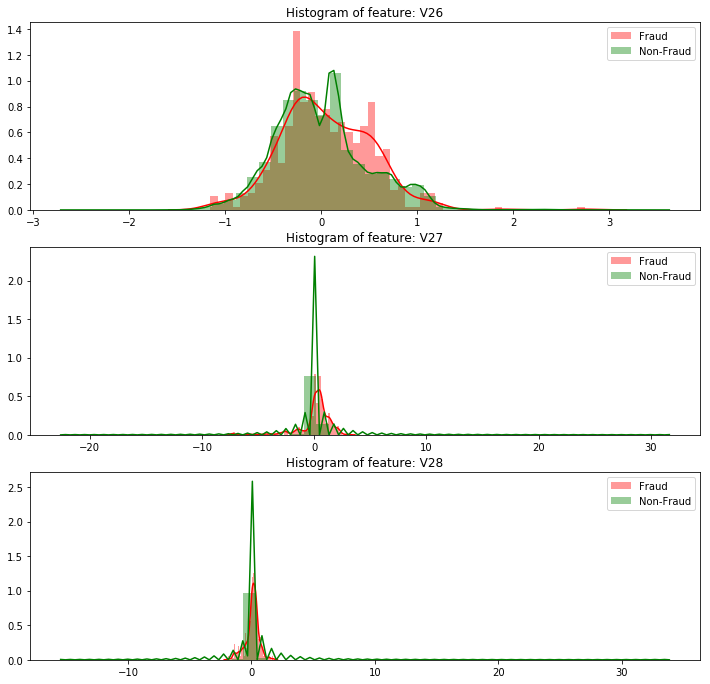

In [61]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, col in enumerate(credit.columns[26:29]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[col][credit.Class == 1], bins=50, color='red', label='Fraud')
    sns.distplot(credit[col][credit.Class == 0], bins=50, color= 'green', label='Non-Fraud')
    ax.set_xlabel('')
    plt.legend()
    ax.set_title('Histogram of feature: ' + str(col))
plt.show()

# HeatMap

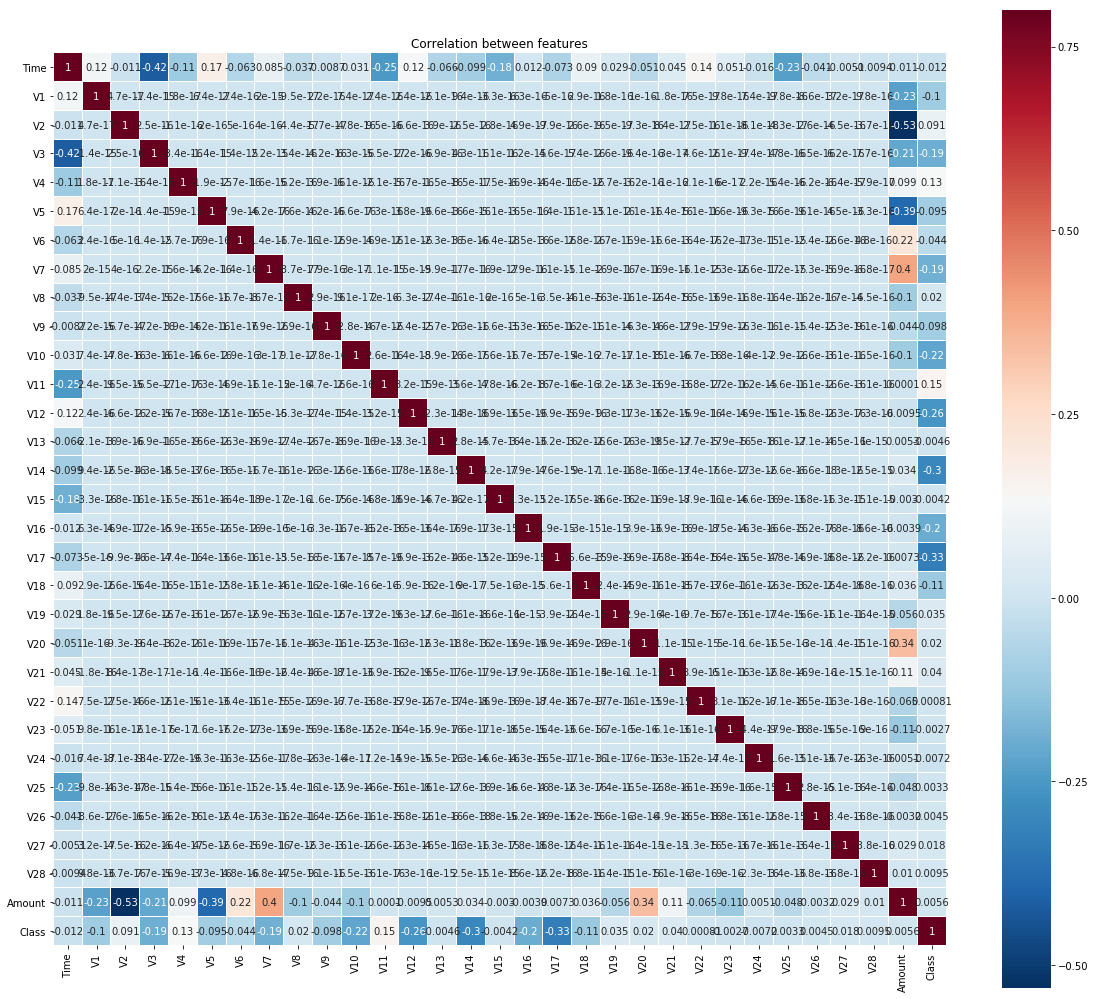

In [66]:
plt.figure(figsize=(20,18))
credit_corr=credit.corr()
sns.heatmap(credit_corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='RdBu_r',linecolor="white")
plt.title('Correlation between features');

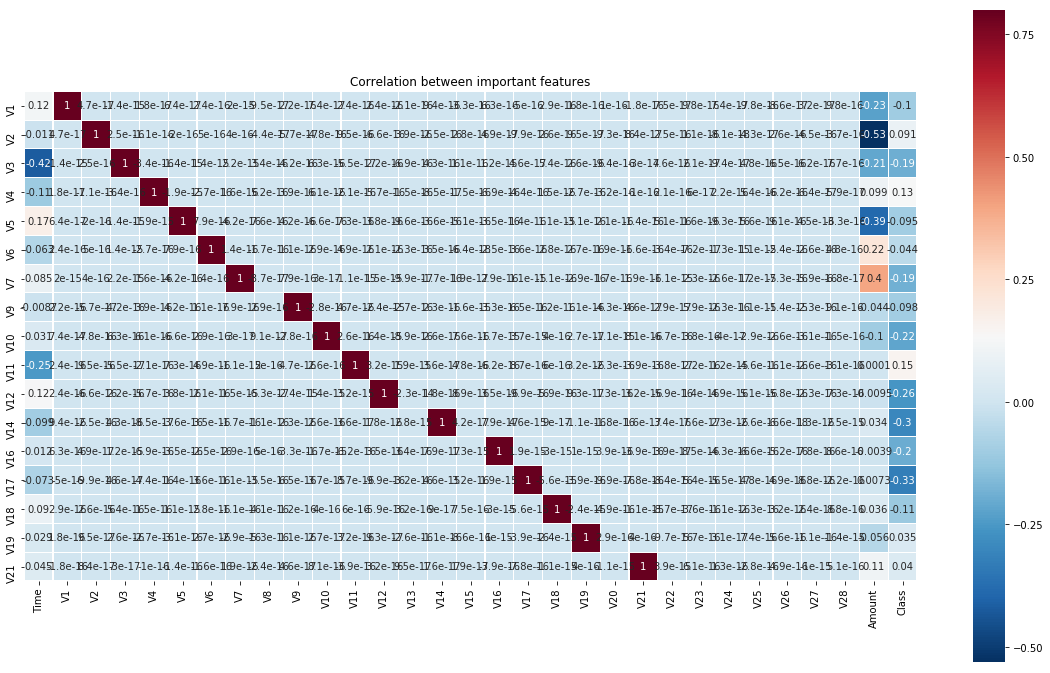

In [72]:
new_credit_corr = credit_corr[(abs(credit_corr.Class) >= 0.03) & (credit_corr.Class !=1)]
plt.figure(figsize=(20,12))
sns.heatmap(new_credit_corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='RdBu_r',linecolor="white")
plt.title('Correlation between important features');